In [3]:
import pandas as pd
import numpy as np

# Step 1: Identify and define risk indicators
risk_indicators = ['volatility', 'drawdown']
import pandas as pd
import numpy as np

np.random.seed(42)  # for reproducibility

# Create a date range for a month of trading days
date_rng = pd.date_range(start='2022-01-01', end='2022-01-31', freq='B')  # B for business days

# Simulate closing prices using a random walk
initial_price = 100
price_changes = np.random.randn(len(date_rng))  # random normal distribution
cumulative_changes = np.cumsum(price_changes)  # cumulative sum to simulate a price series
closing_prices = initial_price + cumulative_changes

# Create DataFrame
historical_data = pd.DataFrame({
    'date': date_rng,
    'close': closing_prices
})

# Save to a CSV (optional)
historical_data.to_csv('historical_data.csv', index=False)

print(historical_data.head())

# Step 2: Collect historical trading data and backtest
historical_data = pd.read_csv('historical_data.csv')
# A basic moving average strategy for illustration
# Adjusting the window sizes to fit our data
short_window = 5
long_window = 20

signals = pd.DataFrame(index=historical_data.index)
signals['price'] = historical_data['close']
signals['short_mavg'] = historical_data['close'].rolling(window=short_window).mean()
signals['long_mavg'] = historical_data['close'].rolling(window=long_window).mean()
signals['signal'] = 0.0
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

# Step 3: Analyze backtested results and calculate risk metrics
# Calculating volatility
signals['daily_return'] = signals['price'].pct_change()
volatility = signals['daily_return'].std()

# Calculate maximum drawdown
rolling_max = signals['price'].cummax()
daily_drawdown = signals['price']/rolling_max - 1.0
max_daily_drawdown = daily_drawdown.cummin()

# Step 4: Implement risk controls and stop-loss mechanisms
stop_loss_threshold = -0.02  # e.g., 2% loss
signals['stop_loss'] = np.where(daily_drawdown < stop_loss_threshold, 1, 0)
signals['final_positions'] = np.where(signals['stop_loss'] == 1, 0, signals['positions'])

# Step 5: Monitor and analyze risk indicators in real-time
# For the purposes of this demo, we'll simulate real-time by iterating over historical data
for index, row in signals.iterrows():
    current_price = row['price']
    current_position = row['final_positions']
    # Trigger risk management action based on real-time data
    if current_position == 1 and row['stop_loss'] == 1:
        print(f"Risk management action triggered at index {index} with price {current_price}")

print(signals.head())

        date       close
0 2022-01-03  100.496714
1 2022-01-04  100.358450
2 2022-01-05  101.006138
3 2022-01-06  102.529168
4 2022-01-07  102.295015
        price  short_mavg  long_mavg  signal  positions  daily_return  \
0  100.496714         NaN        NaN     0.0        NaN           NaN   
1  100.358450         NaN        NaN     0.0        0.0     -0.001376   
2  101.006138         NaN        NaN     0.0        0.0      0.006454   
3  102.529168         NaN        NaN     0.0        0.0      0.015079   
4  102.295015  101.337097        NaN     0.0        0.0     -0.002284   

   stop_loss  final_positions  
0          0              NaN  
1          0              0.0  
2          0              0.0  
3          0              0.0  
4          0              0.0  


[('2023-09-22 17:25:29.206806', '2023-09-22 17:25:29.268806', 62.0), ('2023-09-22 17:25:29.206815', '2023-09-22 17:25:29.282815', 76.0), ('2023-09-22 17:25:29.206819', '2023-09-22 17:25:29.300819', 94.0), ('2023-09-22 17:25:29.206827', '2023-09-22 17:25:29.279827', 73.0), ('2023-09-22 17:25:29.206831', '2023-09-22 17:25:29.290831', 84.0), ('2023-09-22 17:25:29.206836', '2023-09-22 17:25:29.290836', 84.0), ('2023-09-22 17:25:29.206863', '2023-09-22 17:25:29.274863', 68.0), ('2023-09-22 17:25:29.206873', '2023-09-22 17:25:29.305873', 99.0), ('2023-09-22 17:25:29.206884', '2023-09-22 17:25:29.259884', 53.0), ('2023-09-22 17:25:29.206888', '2023-09-22 17:25:29.306888', 100.0), ('2023-09-22 17:25:29.206898', '2023-09-22 17:25:29.283898', 77.0), ('2023-09-22 17:25:29.206907', '2023-09-22 17:25:29.284907', 78.0), ('2023-09-22 17:25:29.206916', '2023-09-22 17:25:29.287916', 81.0), ('2023-09-22 17:25:29.206921', '2023-09-22 17:25:29.303921', 97.0), ('2023-09-22 17:25:29.206925', '2023-09-22 17:

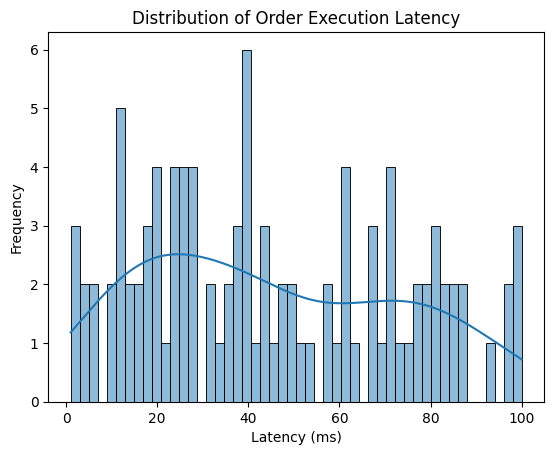

In [6]:
import pandas as pd
import random
import datetime

# Generate simulated trading data
orders = []
for _ in range(100):
    order_timestamp = datetime.datetime.now()
    # Simulating a small delay
    execution_timestamp = order_timestamp + datetime.timedelta(milliseconds=random.randint(1, 100))
    orders.append((order_timestamp, execution_timestamp))

df_orders = pd.DataFrame(orders, columns=['order_timestamp', 'execution_timestamp'])
df_orders['latency'] = (df_orders['execution_timestamp'] - df_orders['order_timestamp']).dt.total_seconds() * 1000  # in milliseconds
average_latency = df_orders['latency'].mean()
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('trading_data.db')
cursor = conn.cursor()

# Create table for orders
cursor.execute('''CREATE TABLE IF NOT EXISTS orders
                  (order_timestamp TEXT, execution_timestamp TEXT, latency REAL)''')

# Insert data into table
df_orders.to_sql('orders', conn, if_exists='replace', index=False)
conn.commit()

# Querying the data (for demonstration)
cursor.execute("SELECT * FROM orders WHERE latency > 50")  # orders with latency more than 50ms
print(cursor.fetchall())
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting latency distribution
sns.histplot(df_orders['latency'], bins=50, kde=True)
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Execution Latency')
plt.show()
